In [1]:
# Le projet provient de la video youtube https://youtu.be/6_2hzRopPbQ?si=5pTSHmeQq9TjJvWP 
# créée par Nicholas Renotte
# lien du dataset: https://github.com/nicknochnack/Tensorflow-in-10-Minutes/blob/main/Churn.csv 

# 0. Import Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [6]:
y_train.head()

231     0
2648    0
3881    0
1836    0
3283    0
Name: Churn, dtype: int64

# 1. Import Dependencies

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 2. Build and Compile Model

In [8]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

# 3. Fit, Predict and Evaluate

In [16]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
177/177 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8007
Epoch 2/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8009
Epoch 3/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8030
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8060
Epoch 5/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7996
Epoch 6/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8067
Epoch 7/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8041
Epoch 8/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8028
Epoch 9/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8037
Epoch 10/200
177/177 [==============================] - 0s 2ms/step - loss: 0.4175 - accura

In [18]:
import matplotlib.pyplot as plt

In [20]:
train_acc = history.history['accuracy']
epochs = range(1, len(train_acc) + 1)

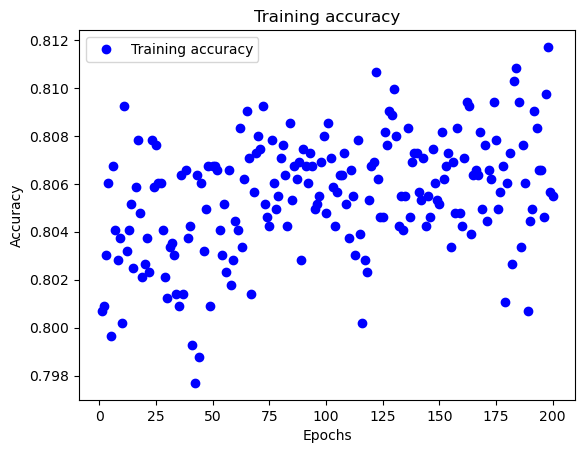

In [22]:
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

45/45 [==============================] - 0s 1ms/step


In [24]:
accuracy_score(y_test, y_hat)

0.7750177430801988

# 4. Saving and Reloading

In [25]:
model.save('tfmodel')

INFO:tensorflow:Assets written to: tfmodel\assets


INFO:tensorflow:Assets written to: tfmodel\assets


In [26]:
del model 

In [27]:
model = load_model('tfmodel')